In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from IPython.core.interactiveshell import InteractiveShell


InteractiveShell.ast_node_interactivity = 'all' 
plt.style.use('ggplot')

C:\Software\Anaconda37\envs\data_science_env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
import json

model_root = 'trained_models/reinforcement_learning'
results = []
for model_name in os.listdir(model_root):
    with open(os.path.join(model_root, model_name, 'config.json')) as f:
        data = json.load(f)
    
    base_model = data['starting_actor_critic']
    if base_model is not None:
        base_model = os.path.basename(base_model)
    progress = pd.read_csv(os.path.join(model_root, model_name, 'progress.txt'), sep='\t')
    
    r = pd.read_csv(os.path.join('reports', f'{model_name}.csv'))
    results.append(
        {'model':model_name, 
         'base_model':base_model, 
         'epochs':progress.Epoch.count(),
         'train_enemies':''.join([str(e) for e in data['enemies']]), 
         'progress':progress,
         'result':r
        })

In [4]:
df = pd.DataFrame([(l['model'], l['base_model'], l['epochs'], l['train_enemies']) for l in results], 
                  columns=['model', 'base_model', 'epochs', 'train_enemies'])
df

,model,base_model,epochs,train_enemies
0,1590573752.3423483,None,228,1367
1,1590579471.1575735,None,1048,1267
2,1590649982.3414495,1590579471.1575735,1336,1267
3,1590741419.5509562,1590579471.1575735,4,3458
4,1590741556.9109056,1590579471.1575735,2000,3458
5,1590827635.8673058,1590579471.1575735,2000,3467
6,1590918282.3727078,1590579471.1575735,1665,1367
7,1591007624.3262362,1590579471.1575735,1594,2367
8,1591084878.9942527,1590579471.1575735,2000,2467
9,1591130472.260961,None,2000,2367


In [5]:
lists = [['1591261004.787129'], ['1591803558.255182'], ['1591891998.8024027']]
for i, row in df.iterrows():
    for l in lists:
        if row.base_model in l:
            l.append(row.model)

In [6]:
progress_list = [r['progress'] for r in results if r['model'] in lists[0]]
progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
progress_df['Epoch'] = progress_df['index']
progress_df.drop(columns='index', inplace=True)
progress_df.set_index('Epoch', inplace=True)

In [7]:
t = []
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    progress_df['Time'] = progress_df['Time'].diff(1)
    
    t.append(progress_df.Time.median())

In [8]:
np.mean(t)
np.median(t)

26.880122582117338

28.028755426406633

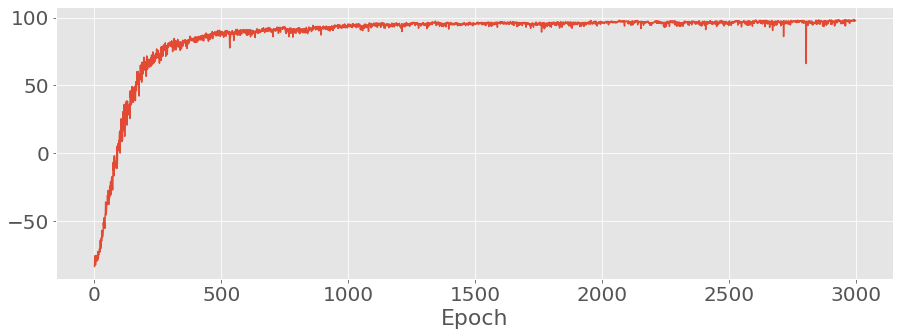

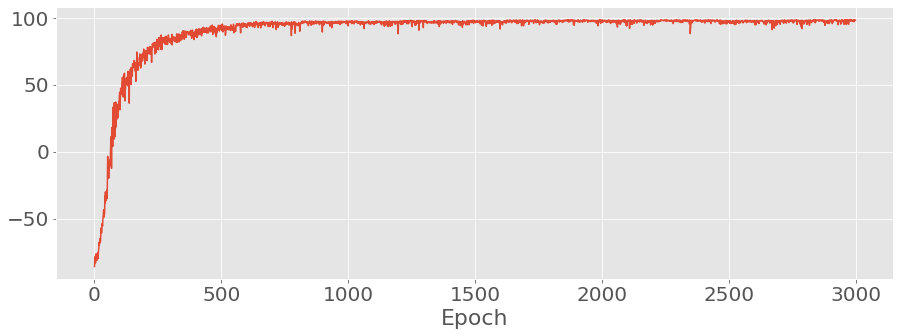

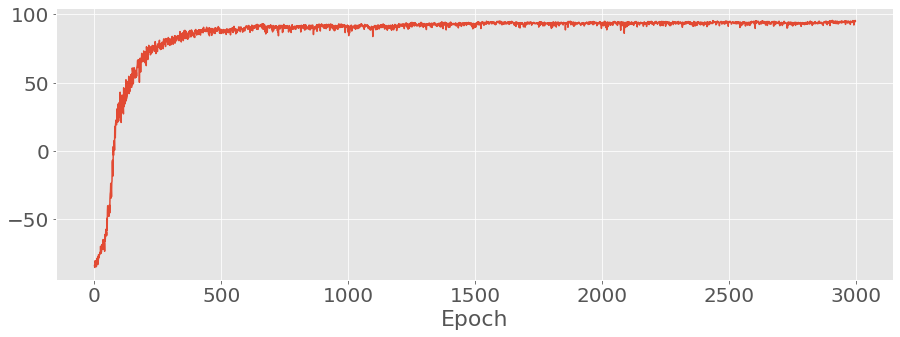

In [9]:
for i, experiment in enumerate(lists):
    progress_list = [r['progress'] for r in results if r['model'] in experiment]
    progress_df = pd.concat(progress_list).reset_index(drop=True).reset_index()
    progress_df['Epoch'] = progress_df['index']
    progress_df.drop(columns='index', inplace=True)
    progress_df.set_index('Epoch', inplace=True)
    _ = progress_df.AverageEpRet.plot()
    plt.show()
    progress_df.reset_index().to_csv(f'data_for_plots/ppo_{i}_progress.csv', index=False)

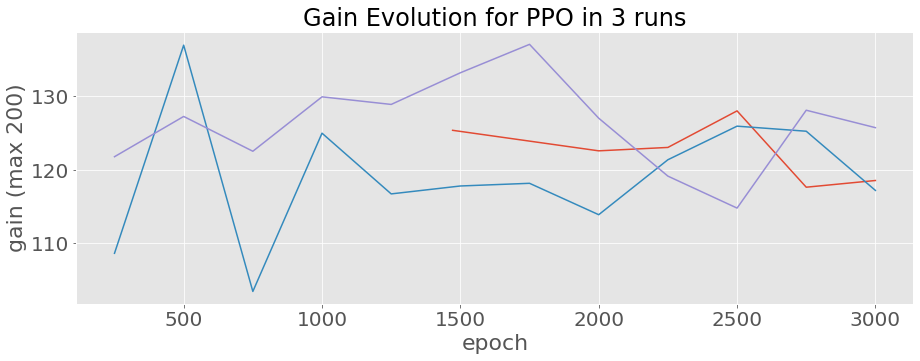

In [10]:
for i, experiment in enumerate(lists):
    progress_list = [(r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in experiment]
    progress = pd.DataFrame(progress_list, columns=['epoch', 'score'])
    progress['epoch'] = progress.epoch.cumsum()
    progress.set_index('epoch', inplace=True)
    _ = progress.score.plot()
#     plt.show()
    progress.reset_index().to_csv(f'data_for_plots/ppo_{i}_result.csv', index=False)    
_ = plt.ylabel('gain (max 200)')
_ = plt.title('Gain Evolution for PPO in 3 runs')
plt.savefig('paper/images/ppo_gain_evolution_3_runs.eps', format='eps')

In [11]:
progress_list = [(r['model'], r['epochs'], 8 / np.sum(1 / r['result'].gain)) for r in results if r['model'] in lists[2]]
progress = pd.DataFrame(progress_list, columns=['model', 'epoch', 'score'])
progress['epoch'] = progress.epoch.cumsum()
progress.set_index('epoch', inplace=True)

In [12]:
[r['result'] for r in results if r['model']=='1591935751.1014764'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration,percentage_games_lost
0,1,200.010000,100.000000,0.000000,174.233333,100.0,100.0,0,0.0,159,329,0.000000
1,2,189.743333,89.733333,0.000000,186.433333,78.0,96.0,0,0.0,143,260,0.000000
2,3,86.343333,7.666667,21.333333,410.533333,0.0,46.0,0,70.0,263,530,53.333333
3,4,80.190000,1.846667,21.666667,736.833333,0.0,32.2,0,60.0,420,1123,93.333333
4,5,160.530000,60.520000,0.000000,367.933333,28.0,81.4,0,0.0,271,544,0.000000
5,6,195.010000,95.000000,0.000000,203.533333,85.6,98.8,0,0.0,175,275,0.000000
6,7,185.910000,85.900000,0.000000,135.133333,72.4,94.0,0,0.0,123,165,0.000000
7,8,136.770000,38.760000,2.000000,443.600000,0.0,68.2,0,40.0,314,717,10.000000


In [13]:
last = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']
found = [r['result'] for r in results if r['model'] in last]

r3 = [8 / np.sum(1/f.gain) for f in found]

In [14]:
last = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
found = [r['result'] for r in results if r['model'] in last]

r2 = [8 / np.sum(1/f.gain) for f in found]

In [15]:
r2

[122.58071320805254, 113.89813214476209, 127.01880705967213]

In [16]:
r3

[118.54738231394401, 117.20056768377583, 125.73243415137807]

In [17]:
r = pd.DataFrame(zip(r2, r3), columns=['2000 epochs', '3000 epochs'])

In [18]:
r

,2000 epochs,3000 epochs
0,122.580713,118.547382
1,113.898132,117.200568
2,127.018807,125.732434


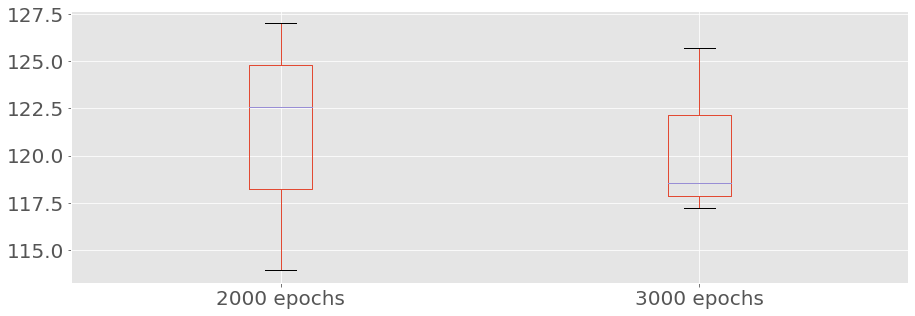

In [19]:
_ = r.boxplot()
plt.savefig('paper/images/final_epochs_comparison.eps', format='eps')

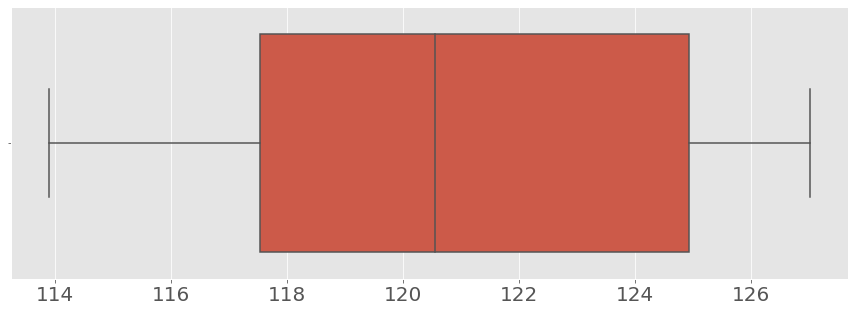

In [20]:
_ = sns.boxplot(r)

In [21]:
np.mean(r3)
np.median(r3)

np.mean(r2)
np.median(r2)

120.49346138303264

118.54738231394401

121.1658841374956

122.58071320805254

In [22]:
last2 = ['1591606067.8750339', '1591851592.3176994', '1591942954.9945362']
last3 = ['1591972086.6519217', '1591880695.9546342', '1591641901.9027252']

found = [r['result'].set_index('enemy').avg_duration for r in results if r['model'] in last2]

# r2 = [8 / np.sum(1/f.gain) for f in found]

In [23]:
model_to_gain = dict()
for r in results:
    model_to_gain[r['model']] = 8 / np.sum(1 / r['result'].gain)

In [24]:
df['gain'] = df.model.apply(lambda m: model_to_gain[m])

In [25]:
[r['result'] for r in results if r['model']=='1591972086.6519217'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration,percentage_games_lost
0,1,198.410000,98.400000,0.000000,177.700000,62.0,100.0,0.0,0.0,158,342,0.000000
1,2,190.810000,90.800000,0.000000,179.033333,86.0,96.0,0.0,0.0,142,240,0.000000
2,3,70.743333,0.066667,29.333333,367.866667,0.0,2.0,0.0,70.0,225,435,96.666667
3,4,61.676667,0.000000,38.333333,569.700000,0.0,0.0,10.0,60.0,393,769,100.000000
4,5,173.830000,73.820000,0.000000,320.233333,57.4,88.0,0.0,0.0,259,422,0.000000
5,6,194.010000,94.000000,0.000000,174.133333,68.8,98.2,0.0,0.0,153,222,0.000000
6,7,192.970000,92.960000,0.000000,124.533333,82.0,94.6,0.0,0.0,123,139,0.000000
7,8,144.763333,45.086667,0.333333,427.266667,0.0,73.0,0.0,10.0,269,693,3.333333


In [26]:
df

,model,base_model,epochs,train_enemies,gain
0,1590573752.3423483,None,228,1367,26.687000
1,1590579471.1575735,None,1048,1267,100.099053
2,1590649982.3414495,1590579471.1575735,1336,1267,122.133110
3,1590741419.5509562,1590579471.1575735,4,3458,95.360921
4,1590741556.9109056,1590579471.1575735,2000,3458,44.165203
5,1590827635.8673058,1590579471.1575735,2000,3467,75.309663
6,1590918282.3727078,1590579471.1575735,1665,1367,110.197467
7,1591007624.3262362,1590579471.1575735,1594,2367,136.106111
8,1591084878.9942527,1590579471.1575735,2000,2467,85.221185
9,1591130472.260961,None,2000,2367,99.979586


In [27]:
4/np.sum(1/results[0]['result'].gain[[0, 1, 5, 6]])

22.0625923959487

In [28]:
last3_names = ['1591641901.9027252', '1591880695.9546342', '1591972086.6519217']
for model_name in last3_names:
    train_hmean = [4/np.sum(1/r['result'].gain[[0, 1, 5, 6]]) for r in results if r['model']==model_name][0]
    print(model_name, train_hmean)

1591641901.9027252 197.91683911502295
1591880695.9546342 195.37391537318447
1591972086.6519217 194.01078832975938


In [29]:
for model_name in last3_names:
    train_hmean = [r['result'].gain for r in results if r['model']==model_name][0]
    print(model_name, train_hmean)

1591641901.9027252 0    197.276667
1    198.343333
2     56.810000
3     62.343333
4    171.330000
5    196.330000
6    199.750000
7    128.310000
Name: gain, dtype: float64
1591880695.9546342 0    199.810000
1    199.543333
2     52.010000
3     64.103333
4    162.263333
5    197.370000
6    185.503333
7    147.150000
Name: gain, dtype: float64
1591972086.6519217 0    198.410000
1    190.810000
2     70.743333
3     61.676667
4    173.830000
5    194.010000
6    192.970000
7    144.763333
Name: gain, dtype: float64


In [30]:
for model_name in last3_names + ['1591935751.1014764']:
    train_hmean = [r['result'].percentage_games_lost for r in results if r['model']==model_name][0]
    print(model_name, 100-train_hmean, sep='\n')

1591641901.9027252
0    100.000000
1    100.000000
2      3.333333
3      0.000000
4    100.000000
5    100.000000
6    100.000000
7     80.000000
Name: percentage_games_lost, dtype: float64
1591880695.9546342
0    100.000000
1    100.000000
2      0.000000
3      6.666667
4     96.666667
5    100.000000
6     93.333333
7    100.000000
Name: percentage_games_lost, dtype: float64
1591972086.6519217
0    100.000000
1    100.000000
2      3.333333
3      0.000000
4    100.000000
5    100.000000
6    100.000000
7     96.666667
Name: percentage_games_lost, dtype: float64
1591935751.1014764
0    100.000000
1    100.000000
2     46.666667
3      6.666667
4    100.000000
5    100.000000
6    100.000000
7     90.000000
Name: percentage_games_lost, dtype: float64


In [34]:
[r['result'] for r in results if r['model']=='1591935751.1014764'][0]

,enemy,gain,avg_player_life,avg_enemy_life,avg_duration,min_player_life,max_player_life,min_enemy_life,max_enemy_life,min_duration,max_duration,percentage_games_lost
0,1,200.010000,100.000000,0.000000,174.233333,100.0,100.0,0,0.0,159,329,0.000000
1,2,189.743333,89.733333,0.000000,186.433333,78.0,96.0,0,0.0,143,260,0.000000
2,3,86.343333,7.666667,21.333333,410.533333,0.0,46.0,0,70.0,263,530,53.333333
3,4,80.190000,1.846667,21.666667,736.833333,0.0,32.2,0,60.0,420,1123,93.333333
4,5,160.530000,60.520000,0.000000,367.933333,28.0,81.4,0,0.0,271,544,0.000000
5,6,195.010000,95.000000,0.000000,203.533333,85.6,98.8,0,0.0,175,275,0.000000
6,7,185.910000,85.900000,0.000000,135.133333,72.4,94.0,0,0.0,123,165,0.000000
7,8,136.770000,38.760000,2.000000,443.600000,0.0,68.2,0,40.0,314,717,10.000000


In [37]:
for model_name in ['1591641901.9027252', '1591935751.1014764']:
    train_hmean = [r['result'][['avg_player_life', 'avg_enemy_life', 'avg_duration']] for r in results if r['model']==model_name][0]
    print(model_name, train_hmean, sep='\n')

1591641901.9027252
   avg_player_life  avg_enemy_life  avg_duration
0        97.266667        0.000000    159.633333
1        98.333333        0.000000    176.600000
2         0.133333       43.333333    457.266667
3         0.000000       37.666667    547.500000
4        71.320000        0.000000    379.133333
5        96.320000        0.000000    165.066667
6        99.740000        0.000000    162.066667
7        34.300000        6.000000    520.933333
1591935751.1014764
   avg_player_life  avg_enemy_life  avg_duration
0       100.000000        0.000000    174.233333
1        89.733333        0.000000    186.433333
2         7.666667       21.333333    410.533333
3         1.846667       21.666667    736.833333
4        60.520000        0.000000    367.933333
5        95.000000        0.000000    203.533333
6        85.900000        0.000000    135.133333
7        38.760000        2.000000    443.600000


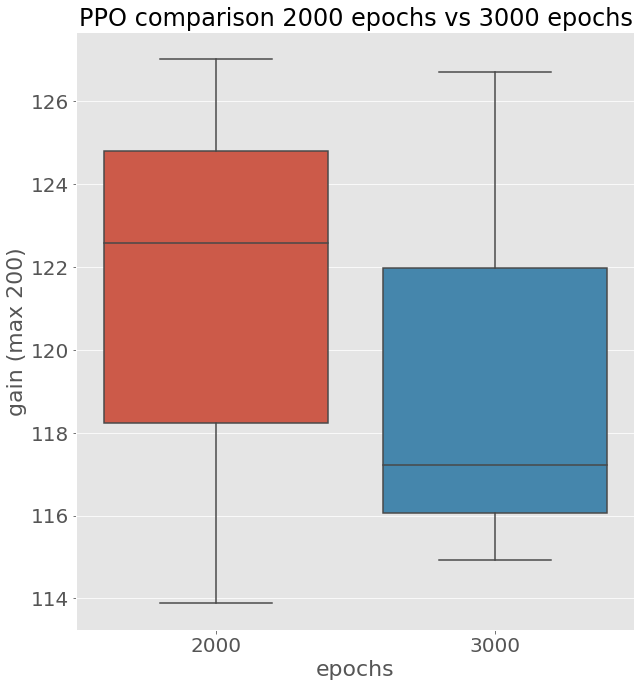

In [31]:
last2 = pd.DataFrame([122.580713, 113.898132, 127.018807], columns=['gain'])
last3 = pd.DataFrame([117.224849, 114.915070, 126.701419], columns=['gain'])
last2['epochs'] = 2000
last3['epochs'] = 3000
c = pd.merge(last2, last3, how='outer')

fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='epochs', y='gain', data=c, ax=ax)
_ = ax.set_ylabel('gain (max 200)')
_ = ax.set_title('PPO comparison 2000 epochs vs 3000 epochs')
fig.savefig('paper/images/ppo_2000_vs_3000_epochs.eps', format='eps')

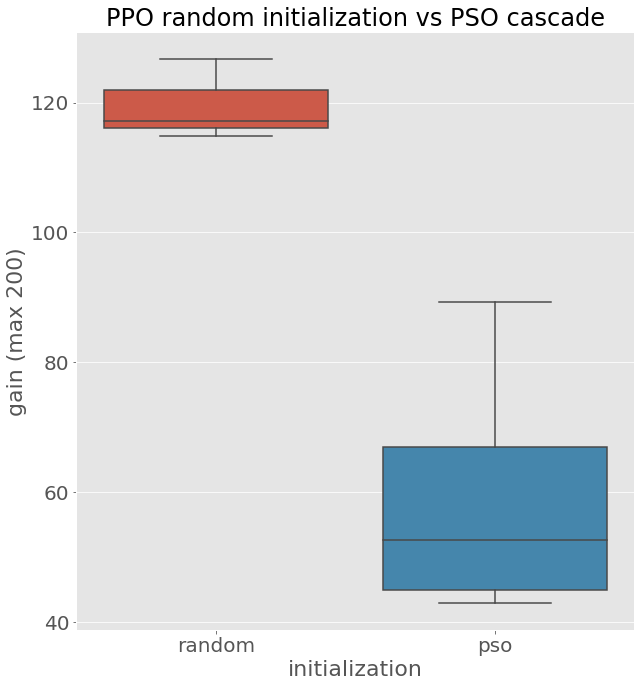

In [32]:
cascade = pd.DataFrame([43.005925, 45.693536, 59.552746, 89.266536], columns=['gain'])
ri = pd.DataFrame([117.224849, 114.915070, 126.701419, None], columns=['gain'])
ri['initialization'] = 'random'
cascade['initialization'] = 'pso'
c = pd.merge(ri, cascade, how='outer')


fig, ax = plt.subplots(figsize=(10, 11))
_ = sns.boxplot(x='initialization', y='gain', data=c, ax=ax)
_ = ax.set_title('PPO random initialization vs PSO cascade')
_ = ax.set_ylabel('gain (max 200)')
fig.savefig('paper/images/random_vs_pso_initialization.eps', format='eps')